In [1]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
from numpy import mean
from numpy import std
import warnings
warnings.filterwarnings(action="ignore",category=DeprecationWarning)

In [2]:
def h5opener(filename):
    with h5py.File(filename,'r') as f:
#         print("Keys: %s" % f.keys())
        X = f['x'][:]
        Y = f['y'][:]
    return X,Y

def plotUtil(filename, outlier_remove = 'no'):
    if(outlier_remove == 'yes'):
        X,Y = outlier_removal(filename)
    else:
        X,Y = h5opener(filename)

    numClasses = len(list(set(Y)))
    colors = ['red', 'green', 'blue']
    for i in range(numClasses):
        plt.scatter(X[Y==i,0],X[Y==i,1],c = colors[i], label = ('Class '+ str(i)), edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc = 'upper right' )
    plt.title(filename)
    plt.show()
    print('\n')
    
def kernel_plot(filename, kernel_type, c, degree, outlier_remove = 'no'):  
    if(outlier_remove == 'yes'):
        X,Y = outlier_removal(filename)
    else:
        X,Y = h5opener(filename)
        
    xmin,xmax = X[:,0].min()-1, X[:,0].max()+1
    ymin,ymax = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(xmin,xmax,0.02), np.arange(ymin,ymax,0.02))
    if(kernel_type=='poly'):
        svm_model = svm.SVC(kernel = kernel_type,degree = degree, C = c).fit(X,Y)
    elif(kernel_type=='linear'):
        svm_model = svm.SVC(kernel = kernel_type, C = c).fit(X,Y)
    elif(kernel_type=='rbf'):
        svm_model = svm.SVC(kernel = kernel_type, gamma = 'auto',C = c).fit(X,Y)
    else: print('Kernel type not supported')
    
    Z = svm_model.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    
    plt.scatter(X[:,0],X[:,1], c=Y, cmap=plt.cm.coolwarm, s=30,edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('Dataset: '+ filename + '   ' + 'Kernel: '+kernel_type)
    plt.show()
    print('\n')
    
def outlier_removal(filename):
    X,Y = h5opener(filename)
    X1 = X[:,0]   #feature 1
    X2 = X[:,1]   #feature 2
    print('Original No of Examples: ', len(X))
    
    meanX1 = mean(X1)
    sdX1   = std(X1)
    meanX2 = mean(X2)
    sdX2   = std(X2)
    
    X1temp = []
    X2temp = []
    Ytemp  = []
    
    cur_idx = 0
    for x in X1:
        if( (x > (meanX1 - 2*sdX1)) and (x < (meanX1 + 2*sdX1))):
            X1temp.append(x)
            X2temp.append(X2[cur_idx])
            Ytemp.append(Y[cur_idx])
        cur_idx += 1
    
    X1 = []
    X2 = []
    Y  = []

    cur_idx = 0
    for x in X2temp:
        if (x > (meanX2 - 3*sdX2)) and (x < (meanX2 + 3*sdX2)):
            X2.append(x)
            X1.append(X1temp[cur_idx])
            Y.append(Ytemp[cur_idx])
        cur_idx += 1
    
    X = np.vstack((X1,X2)).T
    Y = np.asarray(Y)
    print('No of Examples after removing outliers: ', len(X))
    
    return X,Y

Original No of Examples:  100
No of Examples after removing outliers:  100


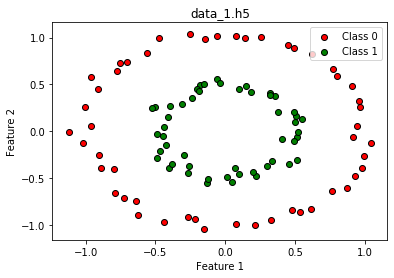



Original No of Examples:  100
No of Examples after removing outliers:  100


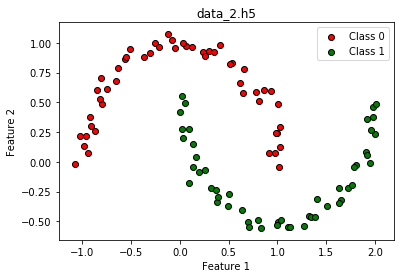



Original No of Examples:  100
No of Examples after removing outliers:  100


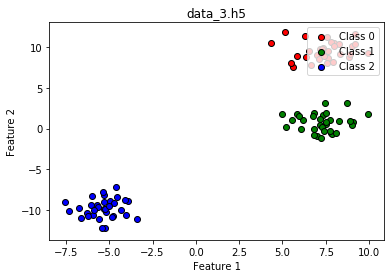



Original No of Examples:  2000
No of Examples after removing outliers:  1946


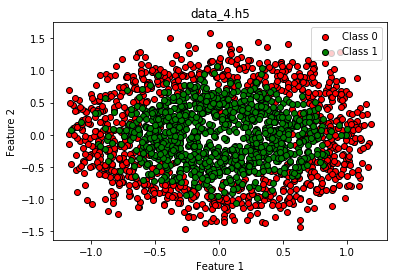



Original No of Examples:  2000
No of Examples after removing outliers:  1938


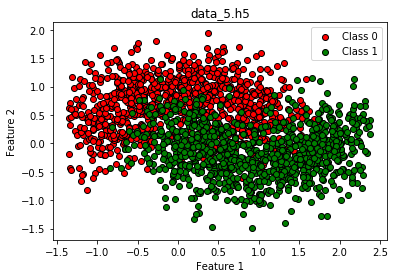



Original No of Examples:  100
No of Examples after removing outliers:  100


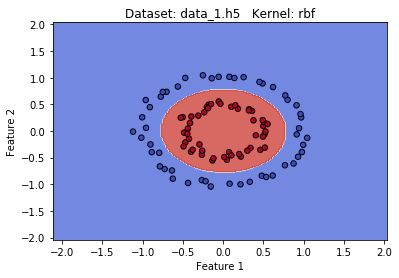



Original No of Examples:  100
No of Examples after removing outliers:  100


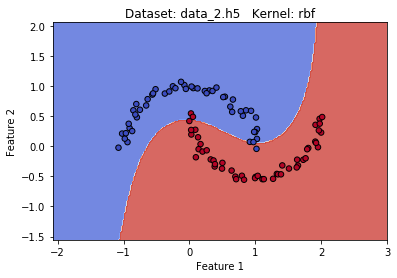



Original No of Examples:  100
No of Examples after removing outliers:  100


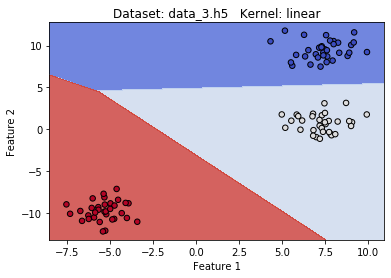



Original No of Examples:  2000
No of Examples after removing outliers:  1946


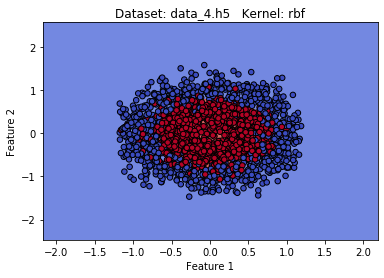



Original No of Examples:  2000
No of Examples after removing outliers:  1938


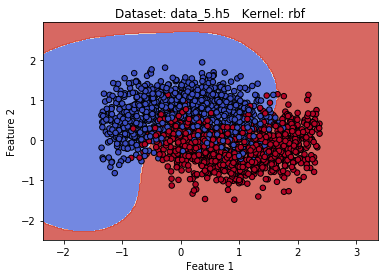

In [3]:
if __name__ == '__main__':
    
    plotUtil('data_1.h5','yes')
    plotUtil('data_2.h5','yes')
    plotUtil('data_3.h5','yes')
    plotUtil('data_4.h5','yes')
    plotUtil('data_5.h5','yes')
    kernel_plot('data_1.h5', 'rbf',1, -1,'yes')
    kernel_plot('data_2.h5', 'rbf',1, -1,'yes')
    kernel_plot('data_3.h5', 'linear',1, -1,'yes')
    kernel_plot('data_4.h5', 'rbf',1, -1,'yes')
    kernel_plot('data_5.h5', 'rbf',1, -1,'yes')
    pass
